**Pomembni stolpci**

In [21]:
import pandas as pd

df = pd.read_csv('koncniPodatkiZaModel.csv', sep=',')

pomembni = df[['smart_5_raw','smart_187_raw','smart_188_raw']]
display(pomembni)
display(pomembni.isnull().sum())

# !!odpovedi je samo 8, rabimo utezi, vec takih primerov iz drugih datasetov...
odpovedi = df.loc[df['failure'] == 1]
display(odpovedi)

,smart_5_raw,smart_187_raw,smart_188_raw
0,0.0,NaN,NaN
1,NaN,NaN,NaN
2,2657.0,NaN,NaN
3,144.0,683.0,4.295361e+09
4,843.0,NaN,NaN
...,...,...,...
8823,0.0,NaN,NaN
8824,0.0,NaN,NaN
8825,0.0,NaN,NaN
8826,0.0,NaN,NaN


smart_5_raw        65
smart_187_raw    5555
smart_188_raw    5563
dtype: int64

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-11-14,6250A0N8FVKG,TOSHIBA MG08ACA16TA,16000900661248,1,iad1,50,1004,5,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8819,2025-09-24,81K0A0BAFV8G,TOSHIBA MG08ACA16TEY,16000900661248,1,ams5,31,2017,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8820,2024-10-14,ZL2LN4XM,ST16000NM001G,16000900661248,1,phx1,40,2007,16,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8821,2025-09-16,X880A0HBF97G,TOSHIBA MG07ACA14TA,14000519643136,1,phx1,0,1063,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8823,2025-05-28,8CH0VY3E,HGST HUH721212ALN604,12000138625024,1,sac2,0,1126,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Rough Preprocessing**

odstranjevanje vecine NaN vrednosti, fokus na pomembne stolpce, ....

In [22]:
import pandas as pd

df = pd.read_csv('koncniPodatkiZaModel.csv', sep=',')
display(df.head(5))
display(df.shape)

NaN = df.isnull().mean()

nujni_stolpci = [
    'smart_5_raw', 
    'smart_187_raw', 
    'smart_188_raw', 
    'smart_197_raw', 
    'smart_198_raw', 
    'smart_9_raw', 
    'smart_194_raw', 
    'capacity_bytes', 
    'model',
    'failure'
]

#obdrži stolpec, če ima < 30% NaN ALI če je na seznamu nujnih
relevantni = NaN[(NaN < 0.3) | (NaN.index.isin(nujni_stolpci))].index.tolist()

print(f"Obdržali bomo {len(relevantni)} stolpcev.")

zaStran = [col for col in df.columns if col not in relevantni]
df = df.drop(columns=zaStran)

display(df.shape)
display(df)

# "lokacijski stolpci" od blackblaze fizicnih serverjev, ki jih ne rabimo... "pod_slot_num" je mogoce ze izbrisa?..
lokacijski = df[['datacenter','cluster_id','vault_id','pod_id','is_legacy_format']]

#ostali nepomembni
nepomembniOstalo = df[['date','serial_number']]

# vsi "normalized" so samo interpetacija proizvajalca, ker je vec proizvajalcev so nekonsistentni
def vsiNorm(df):
    normStolpci = []

    for col in df.columns:
        if 'normalized' in col:
            normStolpci.append(col)
    return normStolpci

normStolpci = vsiNorm(df)
df = df.drop(columns=normStolpci)
df = df.drop(columns=lokacijski)
df = df.drop(columns=nepomembniOstalo)
display(df.shape)   #19 dejansko uporabnih stolpcev ..
display(df.columns)
print(df.head())

#df.to_csv('izbolsani_podatki.csv', index=False)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2025-04-08,1ZG0WX3D,WDC WUH722222ALE6L4,22000969973760,0,iad1,50,1021,0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(8828, 197)

Obdržali bomo 40 stolpcev.


(8828, 40)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,is_legacy_format,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2025-04-08,1ZG0WX3D,WDC WUH722222ALE6L4,22000969973760,0,iad1,50,1021,0,False,...,100.0,540.0,57.0,38.0,100.0,0.0,100.0,0.0,100.0,0.0
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,False,...,99.0,7679.0,65.0,30.0,100.0,0.0,100.0,0.0,100.0,0.0
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,False,...,99.0,2597.0,29.0,29.0,94.0,3040.0,94.0,3040.0,200.0,0.0
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,False,...,100.0,113.0,100.0,33.0,100.0,5.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,2025-05-28,8CH0VY3E,HGST HUH721212ALN604,12000138625024,1,sac2,0,1126,12,False,...,99.0,2023.0,166.0,36.0,100.0,1711.0,100.0,0.0,200.0,0.0
8824,2025-01-19,70X0A03QF97G,TOSHIBA MG07ACA14TA,14000519643136,0,sac2,0,1159,16,False,...,100.0,138.0,100.0,32.0,100.0,0.0,100.0,0.0,200.0,0.0
8825,2025-07-31,8160A01YFVKG,TOSHIBA MG08ACA16TA,16000900661248,0,phx1,0,1415,9,False,...,100.0,17.0,100.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
8826,2025-05-07,41D0A0FUFV8G,TOSHIBA MG08ACA16TEY,16000900661248,1,ams5,31,2008,14,False,...,100.0,70.0,100.0,34.0,NaN,NaN,100.0,0.0,200.0,0.0


(8828, 19)

Index(['model', 'capacity_bytes', 'failure', 'smart_1_raw', 'smart_3_raw',
       'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 'smart_9_raw',
       'smart_10_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_198_raw', 'smart_199_raw'],
      dtype='object')

                  model  capacity_bytes  failure  smart_1_raw  smart_3_raw  \
0   WDC WUH722222ALE6L4  22000969973760        0          0.0        220.0   
1  HGST HUH721212ALE604  12000138625024        1          NaN          NaN   
2   WDC WUH721414ALE6L4  14000519643136        1    2359296.0         73.0   
3         ST14000NM0138  14000519643136        1   99008840.0          0.0   
4   TOSHIBA MG07ACA14TA  14000519643136        1          0.0       7815.0   

   smart_4_raw  smart_5_raw  smart_7_raw  smart_9_raw  smart_10_raw  \
0         16.0          0.0          0.0       7803.0           0.0   
1          NaN          NaN          NaN          NaN           NaN   
2          6.0       2657.0          0.0      36453.0           0.0   
3         30.0        144.0   41588433.0      37502.0           0.0   
4          8.0        843.0          0.0      34002.0           0.0   

   smart_12_raw  smart_187_raw  smart_188_raw  smart_192_raw  smart_193_raw  \
0          16.0          

**Vrte diskov**

In [23]:
unikatneVrsteDiskov = df['model'].unique()
print("vrste diskov: ", unikatneVrsteDiskov)

ssd_keywords = ['SSD', 'MTFD', 'SSDSC', '850 PRO', '870 EVO', '860 PRO', '5300']
df['jeSSD'] = df['model'].apply(lambda x: 1 if any(k in str(x).upper() for k in ssd_keywords) else 0)

def getModel(model):
    m = str(model).upper()
    if m.startswith('ST') or 'SEAGATE' in m: return 'Seagate'
    if m.startswith('WDC') or m.startswith('WD') or 'WESTERN' in m: return 'Western Digital'
    if m.startswith('HGST') or m.startswith('HUH') or m.startswith('HMS'): return 'HGST'
    if m.startswith('TOSHIBA') or m.startswith('MG'): return 'Toshiba'
    if m.startswith('SAMSUNG'): return 'Samsung'
    if m.startswith('CT') or 'CRUCIAL' in m: return 'Crucial'
    return 'Other'

df['model'] = df['model'].apply(getModel)

display(df)
ostali = df[df['model'] == 'Other']['model'].unique()
print("nekategorizirani modeli: ", ostali)
modeli = df['model'].unique()
display("kategorizirani modeli: ", modeli)

vrste diskov:  ['WDC WUH722222ALE6L4' 'HGST HUH721212ALE604' 'WDC WUH721414ALE6L4'
 'ST14000NM0138' 'TOSHIBA MG07ACA14TA' 'TOSHIBA MG08ACA16TA'
 'ST12000NM0008' 'ST16000NM001G' 'ST8000NM0055' 'TOSHIBA MG08ACA16TEY'
 'ST12000NM001G' 'ST24000NM002H' 'WDC WUH721816ALE6L4' 'ST14000NM001G'
 'ST8000DM002' 'HGST HUH721212ALN604' 'ST12000NM0007'
 'TOSHIBA MG10ACA20TE' 'TOSHIBA MG08ACA16TE' 'ST16000NM000J'
 'ST12000NM000J' 'ST8000DM005' 'TOSHIBA MQ01ABF050' 'WDC WUH721816ALE6L0'
 'ST10000NM0086' 'HGST HMS5C4040BLE640' 'ST12000NM003G'
 'HGST HUH721212ALE600' 'HGST HUH728080ALE600' 'DELLBOSS VD'
 'TOSHIBA MQ01ABF050M' 'ST16000NM002J' 'TOSHIBA MG07ACA14TEY'
 'TOSHIBA MG09ACA16TE' 'Seagate BarraCuda 120 SSD ZA250CM10003'
 'ST14000NM000J' 'ST14000NM0018' 'CT250MX500SSD1' 'ST500LM030'
 'HGST HUH728080ALE604' 'ST500LM012 HN' 'WDC WD5000LPCX' 'WDC WDS250G2B0A'
 'ST4000DM000' 'Seagate BarraCuda SSD ZA250CM10002'
 'WD Blue SA510 2.5 250GB' 'Seagate IronWolf ZA250NM10002' 'ST500LM021'
 'HGST HUS728T8TALE6

,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,22000969973760,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,16.0,NaN,NaN,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,12000138625024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Western Digital,14000519643136,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,6.0,NaN,NaN,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,14000519643136,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,28.0,683.0,4.295361e+09,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,14000519643136,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,8.0,NaN,NaN,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,12000138625024,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,7.0,NaN,NaN,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,14000519643136,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,12.0,NaN,NaN,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,16000900661248,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,1.0,NaN,NaN,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,16000900661248,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,23.0,NaN,NaN,22.0,70.0,34.0,NaN,0.0,0.0,0


nekategorizirani modeli:  ['Other']


'kategorizirani modeli: '

array(['Western Digital', 'HGST', 'Seagate', 'Toshiba', 'Other',
       'Crucial'], dtype=object)

**Temeljit Preprocessing**

POMEMBNO - Zapolni NaN v teh nujnih stolpcih z 0
Ker XGBoost ne mara popolnih praznin, manjše število NaN pa zna rešiti, 

In [26]:
display(df)

NaNbefore = df.isnull().sum()
print("trenutno Nan: ", NaNbefore)

#pretvorimo byte v gigabyte
df = df.rename(columns={"capacity_bytes":"capacity_gigabytes"})
df['capacity_gigabytes'] = (df['capacity_gigabytes'] / (1024 ** 3)).round(2)
display(df)

#VSE NaN VREDNOSTI

#ŠTEVCI NAPAK (Error Counters)
#tukaj je "0" kul, ker predpostavimo, da če ni podatka, ni bilo napak
#to velja tako za SSD kot za HDD

stevcneNapake = ['smart_1_raw', 'smart_7_raw', 'smart_10_raw', 'smart_192_raw', 'smart_199_raw']
df[stevcneNapake] = df[stevcneNapake].fillna(0)

#MEHANSKI CIKLI (Mechanical Cycles) pazi: SSD vs HDD
#za SSD (jeSSD == 1) damo 0, ker nima motorja in glav
#za HDD (jeSSD == 0) pa ne smemo dati 0, zato uporabimo mediano (srednjo vrednost)
mehanskiStolpci = ['smart_3_raw', 'smart_4_raw', 'smart_193_raw']

for col in mehanskiStolpci:
    # 1. Za SSD varno zapolnimo z 0
    df.loc[(df['jeSSD'] == 1) & (df[col].isnull()), col] = 0
    
    # 2. Za HDD izračunamo mediano (da ne uničimo podatkov z 0)
    mediana_hdd = df.loc[df['jeSSD'] == 0, col].median()
    df.loc[(df['jeSSD'] == 0) & (df[col].isnull()), col] = mediana_hdd

#SPLOŠNA PORABA (Power Cycle)
#vsak disk se vklopi, zato tukaj uporabimo povprečje, ker 0 ni realna.
df['smart_12_raw'] = df['smart_12_raw'].fillna(df['smart_12_raw'].median())

#TEMPERATURA, ITD..
nujniOstali = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw']
df[nujniOstali] = df[nujniOstali].fillna(0)

NaNafter = df.isnull().sum()
print("NaN po procesiranju ", NaNafter)
display(df.head())

display(df.head(10))

#df.to_csv('izbolsani_podatki_sample.csv', index=False)

,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,0.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,16.0,0.0,0.000000e+00,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,0.0,1,0.0,337.0,12.0,0.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,1368.0,0.0,0.0,0.0,0.0,0
2,Western Digital,0.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,6.0,0.0,0.000000e+00,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,0.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,28.0,683.0,4.295361e+09,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,0.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,8.0,0.0,0.000000e+00,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,0.0,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,7.0,0.0,0.000000e+00,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,0.0,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,12.0,0.0,0.000000e+00,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,0.0,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,1.0,0.0,0.000000e+00,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,0.0,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,23.0,0.0,0.000000e+00,22.0,70.0,34.0,0.0,0.0,0.0,0


trenutno Nan:  model                 0
capacity_gigabytes    0
failure               0
smart_1_raw           0
smart_3_raw           0
smart_4_raw           0
smart_5_raw           0
smart_7_raw           0
smart_9_raw           0
smart_10_raw          0
smart_12_raw          0
smart_187_raw         0
smart_188_raw         0
smart_192_raw         0
smart_193_raw         0
smart_194_raw         0
smart_197_raw         0
smart_198_raw         0
smart_199_raw         0
jeSSD                 0
dtype: int64


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,0.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,16.0,0.0,0.000000e+00,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,0.0,1,0.0,337.0,12.0,0.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,1368.0,0.0,0.0,0.0,0.0,0
2,Western Digital,0.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,6.0,0.0,0.000000e+00,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,0.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,28.0,683.0,4.295361e+09,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,0.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,8.0,0.0,0.000000e+00,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,0.0,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,7.0,0.0,0.000000e+00,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,0.0,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,12.0,0.0,0.000000e+00,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,0.0,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,1.0,0.0,0.000000e+00,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,0.0,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,23.0,0.0,0.000000e+00,22.0,70.0,34.0,0.0,0.0,0.0,0


NaN po procesiranju  model                 0
capacity_gigabytes    0
failure               0
smart_1_raw           0
smart_3_raw           0
smart_4_raw           0
smart_5_raw           0
smart_7_raw           0
smart_9_raw           0
smart_10_raw          0
smart_12_raw          0
smart_187_raw         0
smart_188_raw         0
smart_192_raw         0
smart_193_raw         0
smart_194_raw         0
smart_197_raw         0
smart_198_raw         0
smart_199_raw         0
jeSSD                 0
dtype: int64


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,0.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,16.0,0.0,0.000000e+00,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,0.0,1,0.0,337.0,12.0,0.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,1368.0,0.0,0.0,0.0,0.0,0
2,Western Digital,0.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,6.0,0.0,0.000000e+00,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,0.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,28.0,683.0,4.295361e+09,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,0.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,8.0,0.0,0.000000e+00,4.0,113.0,33.0,5.0,0.0,0.0,0


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,0.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,16.0,0.0,0.000000e+00,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,0.0,1,0.0,337.0,12.0,0.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,1368.0,0.0,0.0,0.0,0.0,0
2,Western Digital,0.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,6.0,0.0,0.000000e+00,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,0.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,28.0,683.0,4.295361e+09,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,0.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,8.0,0.0,0.000000e+00,4.0,113.0,33.0,5.0,0.0,0.0,0
5,Toshiba,0.0,1,0.0,8225.0,17.0,9984.0,0.0,17480.0,0.0,17.0,0.0,0.000000e+00,16.0,33.0,38.0,1.0,0.0,0.0,0
6,Toshiba,0.0,0,0.0,7757.0,6.0,0.0,0.0,39700.0,0.0,6.0,0.0,0.000000e+00,2.0,106.0,33.0,0.0,0.0,0.0,0
7,Seagate,0.0,1,210905448.0,0.0,1.0,18992.0,385428547.0,4344.0,0.0,1.0,25.0,0.000000e+00,0.0,191.0,32.0,1368.0,1368.0,0.0,0
8,Seagate,0.0,0,48162368.0,0.0,3.0,0.0,107623468.0,30561.0,0.0,3.0,0.0,0.000000e+00,2.0,4336.0,31.0,0.0,0.0,0.0,0
9,Toshiba,0.0,0,0.0,8153.0,7.0,0.0,0.0,11507.0,0.0,7.0,0.0,0.000000e+00,6.0,28.0,43.0,0.0,0.0,0.0,0


**GRUČENJE**

cilj je razbrati potencialno najbolj podobne skupine diskov med sabo

- KMeans
- standardizacija zaradi velikih im majnih st..("bytes" vs majhne "raw" vrednosti)
- elbow method za iskanje optimalnega st gruc

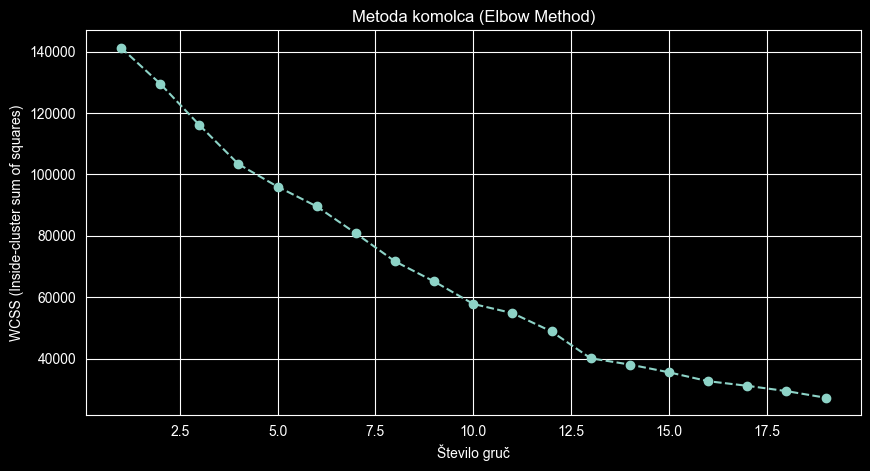

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['model', 'failure'])

X = X.fillna(X.median())

đscaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#metoda komolca
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Metoda komolca (Elbow Method)')
plt.xlabel('Število gruč')
plt.ylabel('WCSS (Inside-cluster sum of squares)')
plt.show()

Prvi dve komponenti pojasnita 47.63% variance.


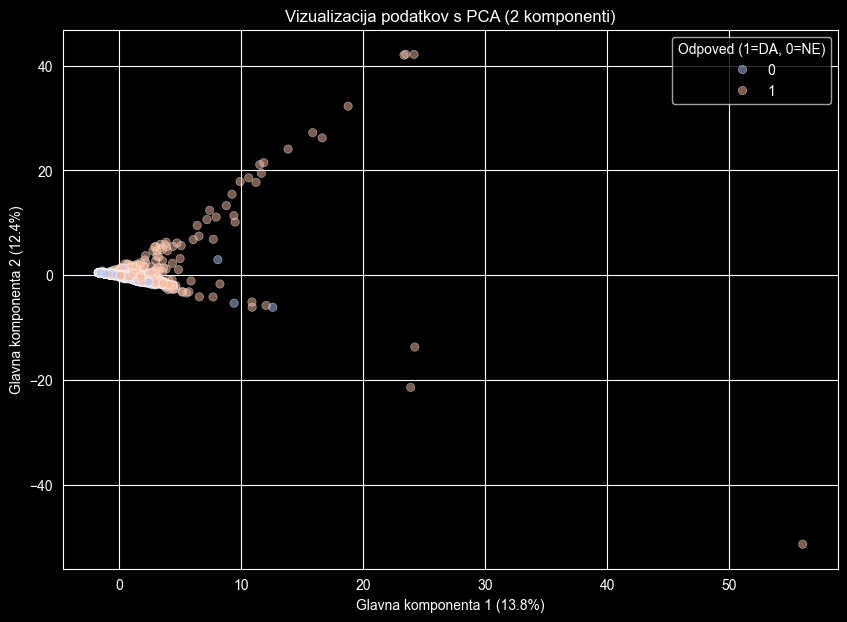

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

X_scaled = StandardScaler().fit_transform(X.fillna(X.median()))

pca = PCA(n_components=2)
komponenti = pca.fit_transform(X_scaled)

dfPca = pd.DataFrame(data = komponenti, columns = ['PC1', 'PC2'])
dfPca['failure'] = df['failure'].values

print(f"Prvi dve komponenti pojasnita {pca.explained_variance_ratio_.sum()*100:.2f}% variance.")

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='failure', data=dfPca, alpha=0.5, palette='coolwarm')
plt.title('Vizualizacija podatkov s PCA (2 komponenti)')
plt.xlabel(f'Glavna komponenta 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Glavna komponenta 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend(title='Odpoved (1=DA, 0=NE)')
plt.show()

ocitno so smart scan podakti tako prepleteni,da se gruc neda naresti oz ni smiselno?